In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer

In [112]:
df = pd.read_csv("cleaneddata.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   995 non-null    object 
 1   ISO3      995 non-null    object 
 2   Industry  995 non-null    object 
 3   Gas_Type  995 non-null    object 
 4   F2010     995 non-null    float64
 5   F2011     995 non-null    float64
 6   F2012     995 non-null    float64
 7   F2013     995 non-null    float64
 8   F2014     995 non-null    float64
 9   F2015     995 non-null    float64
 10  F2016     995 non-null    float64
 11  F2017     995 non-null    float64
 12  F2018     995 non-null    float64
 13  F2019     995 non-null    float64
 14  F2020     995 non-null    float64
 15  F2021     995 non-null    float64
 16  F2022     995 non-null    float64
dtypes: float64(13), object(4)
memory usage: 132.3+ KB


Accuracy: 0.875


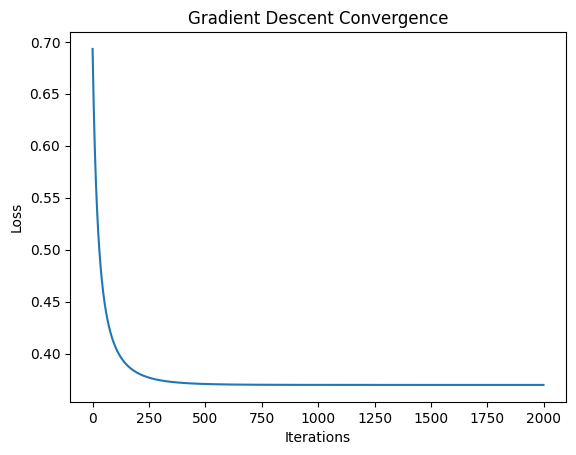

In [113]:


class GradientDescentClassifier:
    def __init__(self, learning_rate=0.01, n_iters=1000, regularization=None, lambda_param=0.01):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.regularization = regularization  # 'l1' or 'l2' or None
        self.lambda_param = lambda_param
        self.losses = [] # To store loss values for plotting

    def fit(self, X, y):
        n_samples, n_features = X.shape

        
        self.weights = np.zeros(n_features)
        self.bias = 0

        
        for _ in range(self.n_iters):
            linear_output = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_output)

            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Regularization (L1 or L2)
            if self.regularization == 'l1':
                dw += self.lambda_param * np.sign(self.weights) / n_samples  # L1
            elif self.regularization == 'l2':
                dw += self.lambda_param * self.weights / n_samples       # L2
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            loss = self._loss(y, y_predicted)
            self.losses.append(loss)


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_output)
        y_predicted_cls = [1 if y > 0.5 else 0 for y in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _loss(self, y, y_pred):  # Binary cross-entropy loss
        n_samples = len(y)
        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, 
                           n_classes=2, n_clusters_per_class=1, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = GradientDescentClassifier(learning_rate=0.1, n_iters=2000, regularization='l2')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
plt.plot(classifier.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Gradient Descent Convergence")
plt.show()

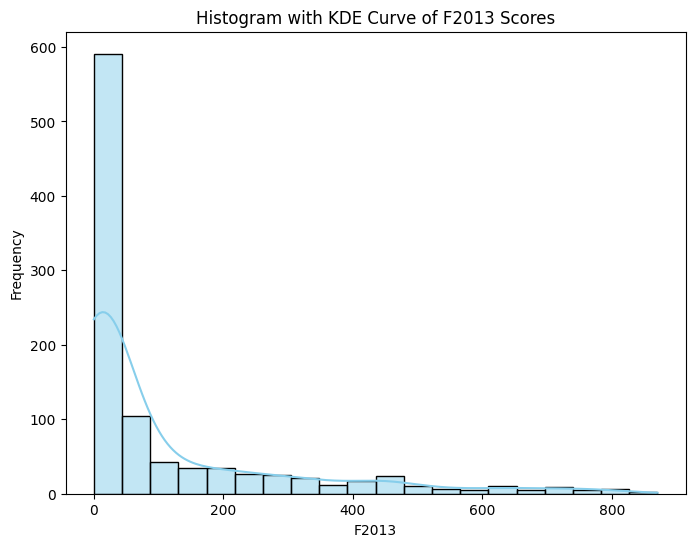

In [114]:
plt.figure(figsize=(8, 6))
sns.histplot(df['F2013'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram with KDE Curve of F2013 Scores')
plt.xlabel('F2013')
plt.ylabel('Frequency')
plt.show()

In [115]:
# Set the threshold for binary classification (e.g., 190 for F2020)
threshold = 190
df['Target'] = (df['F2020'] >= threshold).astype(int)

X = df[['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022']].values

y = df['Target'].values

In [131]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_weights(n_features):
    return np.zeros(n_features), 0

def compute_loss(y, y_pred):
    m = y.shape[0]
    return - (1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def compute_gradients(X, y, y_pred):
    m = X.shape[0]
    dw = (1 / m) * np.dot(X.T, (y_pred - y))
    db = (1 / m) * np.sum(y_pred - y)
    return dw, db
    
def update_weights(weights, bias, dw, db, learning_rate):
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias

def train_logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    n_features = X.shape[1]
    weights, bias = initialize_weights(n_features)
    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        dw, db = compute_gradients(X, y, y_pred)
        weights, bias = update_weights(weights, bias, dw, db, learning_rate)
    return weights, bias

def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return (y_pred >= 0.5).astype(int)

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

# Generate dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
weights, bias = train_logistic_regression(X_train, y_train)

# Predict
y_pred = predict(X_test, weights, bias)

# Evaluate
metrics = evaluate_model(y_test, y_pred)
print("Logistic Regression Model from Scratch:")
print(metrics)


Logistic Regression Model from Scratch:
{'Accuracy': 0.825, 'Precision': 0.8877551020408163, 'Recall': 0.7837837837837838, 'F1 Score': 0.8325358851674641}


In [132]:
# Train the model
weights, bias = train_logistic_regression(X, y, learning_rate=0.01, epochs=1000)

# Make predictions
y_pred = predict(X, weights, bias)


In [138]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature Engineering and Preprocessing
X = df.drop(columns=['Target', 'ISO3'])  # Drop Target as it's the label, ISO3 as it might be irrelevant
y = df['Target']

# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=['Country', 'Industry', 'Gas_Type'], drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [135]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Logistic Regression Performance:
Accuracy: 0.9899497487437185
Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       161
           1       0.95      1.00      0.97        38

    accuracy                           0.99       199
   macro avg       0.97      0.99      0.98       199
weighted avg       0.99      0.99      0.99       199

Confusion Matrix:
 [[159   2]
 [  0  38]]


In [136]:
# Random Forest Regressor
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.9949748743718593
Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       161
           1       0.97      1.00      0.99        38

    accuracy                           0.99       199
   macro avg       0.99      1.00      0.99       199
weighted avg       1.00      0.99      0.99       199



In [120]:
### Hyperparameter Optimzation with Cross-validation ###
from sklearn.model_selection import GridSearchCV

# Set the hyperparameters for RandomForest
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'n_estimators': 200}


In [121]:
min_samples = min(X_train.shape[0], y_train.shape[0])
X_train = X_train[:min_samples, :]
y_train = y_train[:min_samples]


In [107]:
column_names = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']
X_train_df = pd.DataFrame(X_train, columns=column_names)


In [137]:
# Feature Selection
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['F2014', 'F2016', 'F2017', 'F2018', 'F2019'], dtype='object')


In [110]:
### Final model performance ###
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming 'selected_features' contains the relevant features from your dataset
selected_features = ['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 
                     'F2016', 'F2017', 'F2018', 'F2019', 'F2021', 'F2022']

# Extract features (X) and target (y)
X = df[selected_features].values
y = df['F2020'].values  # Target variable (e.g., 'F2020')

# Ensure y is 1D
y = y.ravel()

# Train-test split for final model
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_final_model = RandomForestRegressor(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    random_state=42
)

rf_final_model.fit(X_train_selected, y_train)

final_pred = rf_final_model.predict(X_test_selected)

print("Final Model Performance:")
print("Test MSE:", mean_squared_error(y_test, final_pred))
print("Test R-squared:", r2_score(y_test, final_pred))


Final Model Performance:
Test MSE: 45.9663851368258
Test R-squared: 0.9983077200639418
